<a href="https://colab.research.google.com/github/roeezolantz/whatsapp-messages-parsings/blob/master/bro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read and Parse the Data

In [0]:
import re

def startsWithDateTime(s):
    # 10/17/15, 18:48 - רועי זולנץ: להלה בלהבלה
    pattern = '^([1-9]|0[1-9]|1[0-2]|)(\/)([1-9]|[0-2][1-9]|3[0-1])(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    return re.match(pattern, s)

In [0]:
def startsWithAuthor(s):
    # First Name + Last Name
    pattern = '^([\w]+[\s]+[\w]+):'
    return re.match(pattern, s)

In [0]:
def extractLineCols(line):
  splitLine = line.split(' - ')
  date, time = splitLine[0].split(', ')
  message = ' '.join(splitLine[1:])
  
  if startsWithAuthor(message):
      splitMessage = message.split(': ')
      author = splitMessage[0]
      message = ' '.join(splitMessage[1:])
  else:
      author = None
  return date, time, author, message

In [0]:
parsedData = []
conversationPath = './drive/My Drive/chat.txt' 
with open(conversationPath, encoding="utf-8") as fp:    
    messageBuffer = []
    date, time, author = None, None, None

    while True:
        line = fp.readline() 
        if not line:
            break
        line = line.strip()
        if startsWithDateTime(line): # each message starts with a time
            if len(messageBuffer) > 0: # if previous message wasn't a new one, append it
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = extractLineCols(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [245]:
import pandas as pd                     

df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
print(df.count())
print("\n", df.head())

Date       15469
Time       15469
Author     15468
Message    15469
dtype: int64

        Date  ...                                            Message
0  10/17/15  ...  ירד לי האסימון עכשיו ששלחת לי הזמנות במיטאפ כש...
1  10/17/15  ...                                              חחחחח
2  10/17/15  ...                      לא יודע אבל זה סדרה של איזה 6
3  10/17/15  ...                                       כל יום ראשון
4  10/17/15  ...            לא ריאלי ללכת לכל אחד אבל נראה לי 2-3..

[5 rows x 4 columns]


# Number of Messages Per Author

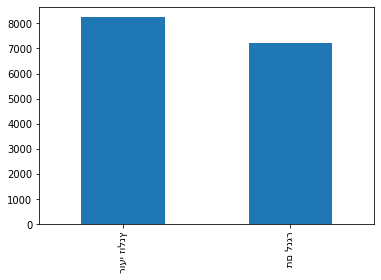

In [246]:
author_value_counts = df['Author'].value_counts()

top_author_value_counts = author_value_counts.head()
top_author_value_counts.plot.bar()

# Media Sent

          Date   Time      Author          Message
count      899    899         899              899
unique     357    548           2                1
top     3/7/18  19:02  רועי זולנץ  <Media omitted>
freq        24     21         467              899


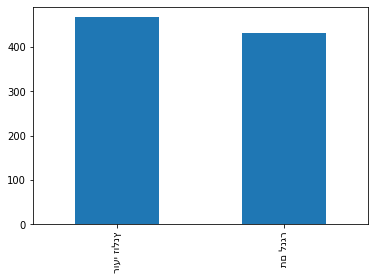

In [247]:
media_messages_df = df[df['Message'] == '<Media omitted>']
print(media_messages_df.describe())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_author_media_messages_value_counts = author_media_messages_value_counts.head()
top_author_media_messages_value_counts.plot.bar()

# Cleanups

In [248]:
null_authors_df = df[df['Author'].isnull()]
null_authors_df.head()

,Date,Time,Author,Message
808,4/5/16,20:14,None,Messages to this chat and calls are now secure...


In [249]:
messages_df = df.drop(null_authors_df.index)
messages_df = messages_df.drop(media_messages_df.index)
messages_df.head()

,Date,Time,Author,Message
0,10/17/15,18:22,רועי זולנץ,ירד לי האסימון עכשיו ששלחת לי הזמנות במיטאפ כש...
1,10/17/15,18:48,תם לנגר,חחחחח
2,10/17/15,18:48,תם לנגר,לא יודע אבל זה סדרה של איזה 6
3,10/17/15,18:48,תם לנגר,כל יום ראשון
4,10/17/15,18:48,תם לנגר,לא ריאלי ללכת לכל אחד אבל נראה לי 2-3..


# Messages that Includes 'אחי'

In [250]:
regex = '([א]+[ח]+[י]+)'
series = messages_df["Message"]
df1 = series.str.contains(regex)
messages_df[df1].count()

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Date       1381
Time       1381
Author     1381
Message    1381
dtype: int64

# Meesages that Includes Only 'אחי'

In [251]:
regex = '^([א]+[ח]+[י]+)$'
series = messages_df["Message"]
bro_filter = series.str.contains(regex)
bro_df = messages_df[bro_filter]
bro_df.head(100)

# bro_df.to_csv('./bro.csv', sep='\t')

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Date,Time,Author,Message
318,12/17/15,11:48,רועי זולנץ,אחי
469,1/15/16,14:12,רועי זולנץ,אחייי
484,1/21/16,09:29,רועי זולנץ,אחייי
674,3/22/16,10:46,רועי זולנץ,אחי
680,3/22/16,10:47,רועי זולנץ,אחי
...,...,...,...,...
7882,9/17/18,16:41,תם לנגר,אחי
7887,9/17/18,16:41,רועי זולנץ,אחייייייי
7912,9/19/18,23:36,רועי זולנץ,אחי
7920,9/22/18,18:54,רועי זולנץ,אחי


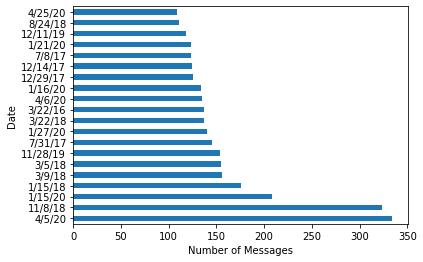

In [252]:
plt.xlabel('Number of Messages')
plt.ylabel('Date')
messages_df['Date'].value_counts().head(20).plot.barh()

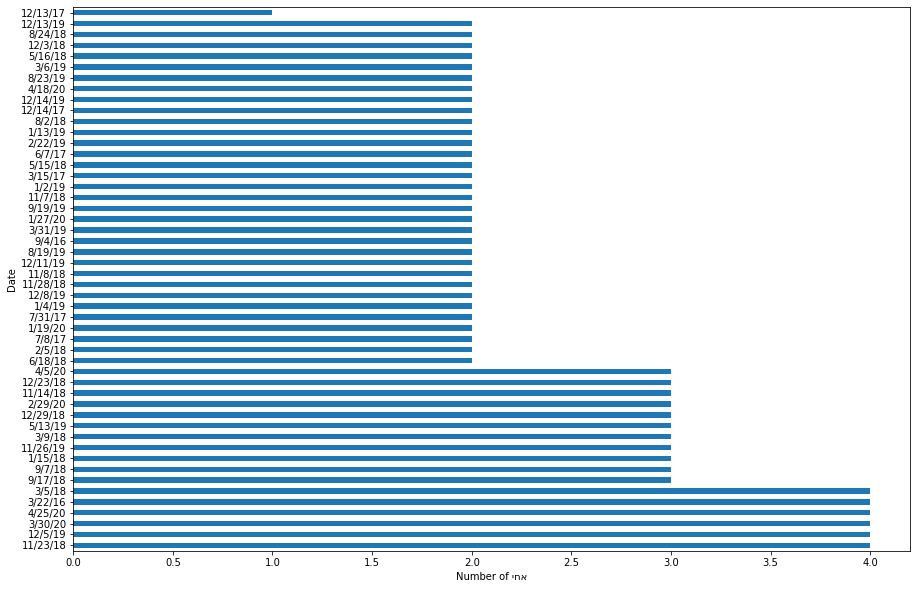

In [253]:
plt.figure(figsize=(15, 10))
plt.xlabel('Number of יחא')
plt.ylabel('Date')
bro_df['Date'].value_counts().head(50).plot.barh()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


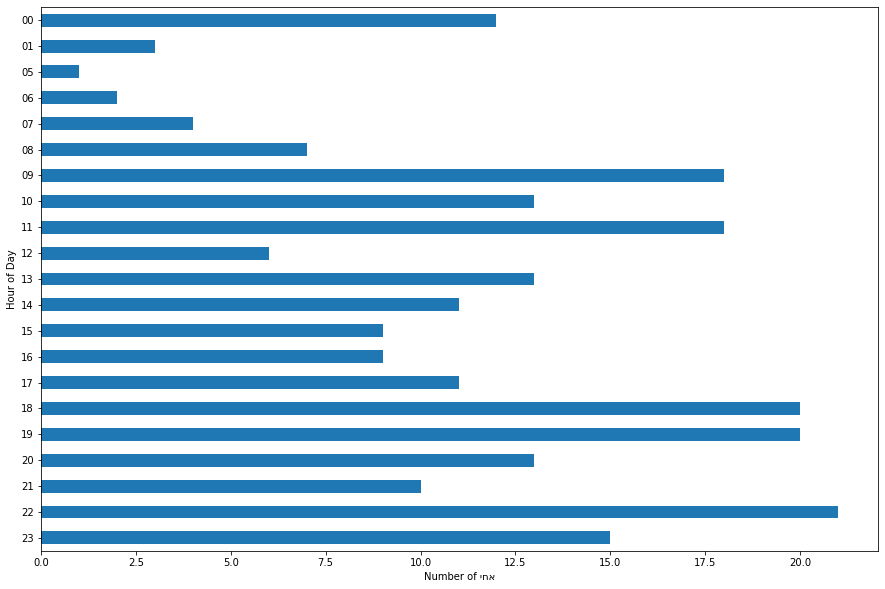

In [254]:
plt.figure(figsize=(15, 10))
plt.xlabel('Number of יחא')
plt.ylabel('Hour of Day')
bro_df['Hour'] = bro_df['Time'].apply(lambda x : x.split(':')[0])
bro_df['Hour'].value_counts().head(24).sort_index(ascending=False).plot.barh()

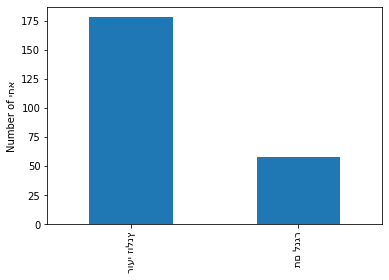

In [255]:
plt.ylabel('Number of יחא')
bro_df['Author'].value_counts().head().plot.bar()